In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3]:
def perceptron_train(X, y, epochs=100, lr=0.01):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0.0
    for epoch in range(epochs):
        for xi, target in zip(X, y):
            linear_output = np.dot(xi, w) + b
            y_pred = 1 if linear_output >= 0 else 0
            update = lr * (target - y_pred)
            w += update * xi
            b += update
    return w, b

def perceptron_predict(X, w, b):
    linear_output = np.dot(X, w) + b
    return (linear_output >= 0).astype(int)


In [4]:
# Train/test perceptron
w, b = perceptron_train(X_train_scaled, y_train)
y_pred_perc = perceptron_predict(X_test_scaled, w, b)
perc_acc = accuracy_score(y_test, y_pred_perc)
print("Perceptron Test Accuracy:", perc_acc)


Perceptron Test Accuracy: 0.9473684210526315


In [5]:
# MLPClassifier with various activation-optimizer pairs
from sklearn.neural_network import MLPClassifier
activations = ['relu', 'tanh', 'logistic']
optimizers = ['adam', 'sgd']

results = []
for activation in activations:
    for optimizer in optimizers:
        clf = MLPClassifier(
            activation=activation,
            solver=optimizer,
            hidden_layer_sizes=(30,),
            max_iter=300,
            random_state=42)
        clf.fit(X_train_scaled, y_train)
        y_pred = clf.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        results.append({"Activation": activation, "Optimizer": optimizer, "MLP Accuracy": acc, "Perceptron Accuracy": perc_acc})

results_df = pd.DataFrame(results)
print(results_df)


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptro

  Activation Optimizer  MLP Accuracy  Perceptron Accuracy
0       relu      adam      0.956140             0.947368
1       relu       sgd      0.973684             0.947368
2       tanh      adam      0.956140             0.947368
3       tanh       sgd      0.973684             0.947368
4   logistic      adam      0.956140             0.947368
5   logistic       sgd      0.947368             0.947368


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


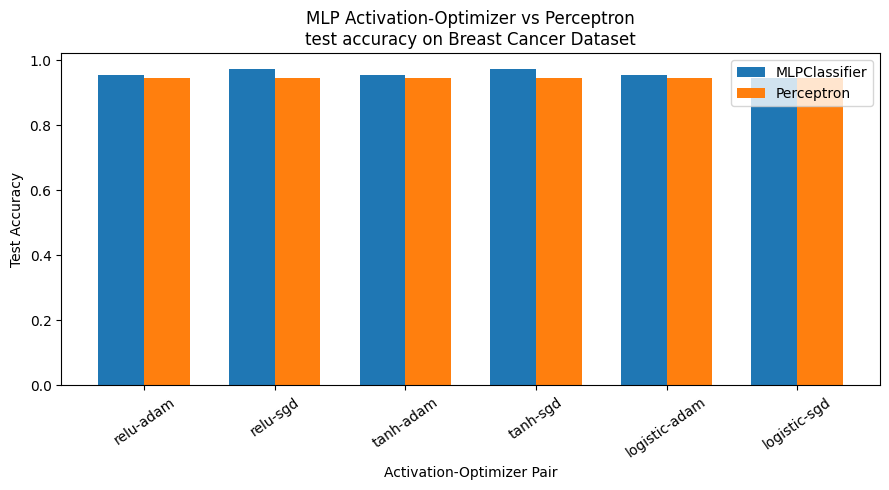

In [6]:
# Visual comparison: Grouped bar chart
labels = [f'{row.Activation}-{row.Optimizer}' for _, row in results_df.iterrows()]
mlp_accs = results_df['MLP Accuracy'].values
perc_accs = results_df['Perceptron Accuracy'].values

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(9,5))
plt.bar(x - width/2, mlp_accs, width, label='MLPClassifier')
plt.bar(x + width/2, perc_accs, width, label='Perceptron')
plt.xlabel('Activation-Optimizer Pair')
plt.ylabel('Test Accuracy')
plt.title('MLP Activation-Optimizer vs Perceptron\ntest accuracy on Breast Cancer Dataset')
plt.xticks(x, labels, rotation=35)
plt.legend()
plt.tight_layout()
plt.show()